# ORIE 4580/5580/5581 Assignment 4

#### Students: Kanishk Agarwal (ka566) and Pratvi Shah (ps2279)

### Github link: https://github.com/Pratvi27/ORIE5581/blob/main/ORIE5581-SimulationHW4.ipynb

### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [4]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
%matplotlib inline
import math
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.style.use('dark_background')
plt.rcParams["image.cmap"] = 'Set3'
# Choosing a colormap for the plot colors
cmap=plt.get_cmap('Set3')
np.random.seed(42)

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

In [5]:
train_passengers = np.random.uniform(0, 1000, 10000)
train_passengers.sort()

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [6]:
T = 10
wait_time = []
for i in range(len(train_passengers)):
  wait_time.append(T - train_passengers[i]%T)
mean = np.mean(wait_time)
print('Mean: ' + str(mean))

conf_int = 1.96*np.std(wait_time)/np.sqrt(len(wait_time))
print('95% confidence interval: [' +  str(mean - conf_int) + ', ' + str(mean + conf_int) + ']')

Mean: 5.017442315700333
95% confidence interval: [4.9608158576541115, 5.074068773746555]


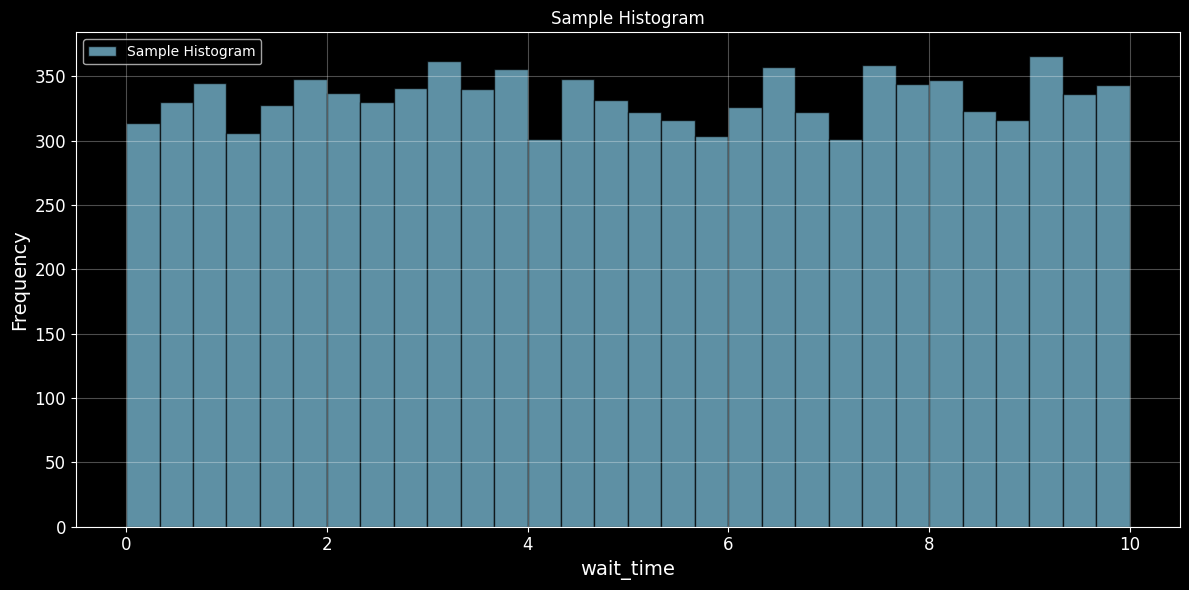

In [7]:
plt.figure(figsize=(12, 6))
plt.hist(wait_time, bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='Sample Histogram')
plt.xlabel('wait_time')
plt.ylabel('Frequency')
plt.title('Sample Histogram')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

In [8]:
trains = np.random.exponential(10, 10000)
train_arrivals = np.cumsum(trains)

In [9]:
wait_time = []
j=0
for i in range(len(train_arrivals)):
  while train_arrivals[i] >= train_passengers[j]:
    wait_time.append(train_arrivals[i] - train_passengers[j])
    j+=1
    if j >= len(train_passengers):
      break
  if j >= len(train_passengers):
    break
mean = np.mean(wait_time)
print('Mean waiting time: ' + str(mean))

conf_int = 1.96*np.std(wait_time)/np.sqrt(len(wait_time))
print('95% confidence interval for wait_time: [' +  str(mean - conf_int) + ', ' + str(mean + conf_int) + ']')

Mean waiting time: 9.672482154442065
95% confidence interval for wait_time: [9.500395762576451, 9.844568546307679]


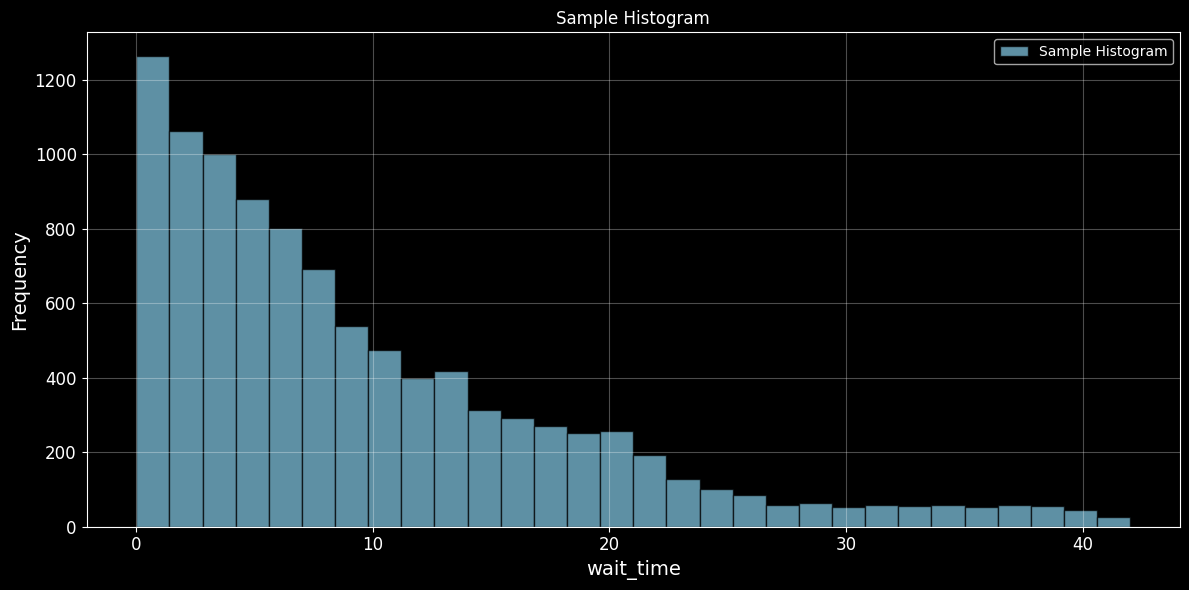

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(wait_time, bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='Sample Histogram')
plt.xlabel('wait_time')
plt.ylabel('Frequency')
plt.title('Sample Histogram')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [11]:
train_arrivals_used = trains[:i]
mean_train_arrivals = np.mean(train_arrivals_used)
print('Mean of inter-arrival time: ' + str(mean_train_arrivals))

conf_int_train_arrivals = 1.96*np.std(train_arrivals_used)/np.sqrt(len(train_arrivals_used))
print('95% confidence interval of inter-arrival time: [' +  str(mean_train_arrivals - conf_int_train_arrivals) + ', ' + str(mean_train_arrivals + conf_int_train_arrivals) + ']')

Mean of inter-arrival time: 10.281672334515546
95% confidence interval of inter-arrival time: [8.355161952797028, 12.208182716234065]


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

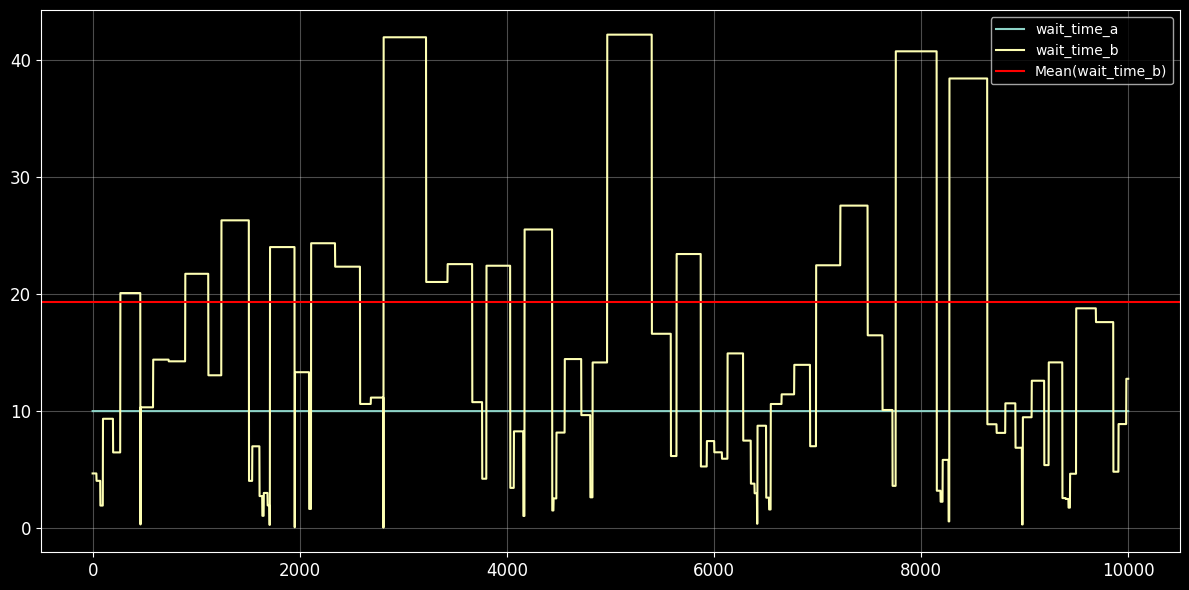

In [12]:
def func_a(train_passengers):
  wait_time = []
  train_timing = [i*T for i in range(1000)]
  j=0
  for i in range(len(train_timing)):
    while train_timing[i] >= train_passengers[j]:
      wait_time.append(train_timing[i] - (train_timing[i-1] if i>0 else 0))
      j+=1
      if j >= len(train_passengers):
        break
    if j >= len(train_passengers):
      break
  return wait_time


def func_b(train_passengers):
  wait_time = []
  j=0
  for i in range(len(train_arrivals)):
    while train_arrivals[i] >= train_passengers[j]:
      wait_time.append(train_arrivals[i] - (train_arrivals[i-1] if i>0 else 0))
      j+=1
      if j >= len(train_passengers):
        break
    if j >= len(train_passengers):
      break
  return wait_time

wait_time_a = func_a(train_passengers)
wait_time_b = func_b(train_passengers)

plt.figure(figsize=(12, 6))
plt.plot(wait_time_a, label='wait_time_a')
plt.plot(wait_time_b, label='wait_time_b')
plt.axhline(y=np.mean(wait_time_b), label='Mean(wait_time_b)', linestyle='-', color='red')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
mean_wait_time_a = np.mean(wait_time_a)
print('Mean waiting time for (a): ' + str(mean_wait_time_a))

conf_int_wait_time_a = 1.96*np.std(wait_time_a)/np.sqrt(len(wait_time_a))
print('95% confidence interval for wait_time: [' +  str(mean_wait_time_a - conf_int_wait_time_a) + ', ' + str(mean_wait_time_a + conf_int_wait_time_a) + ']')

Mean waiting time for (a): 10.0
95% confidence interval for wait_time: [10.0, 10.0]


In [14]:
mean_wait_time_b = np.mean(wait_time_b)
print('Mean waiting time for (b): ' + str(mean_wait_time_b))

conf_int_wait_time_b = 1.96*np.std(wait_time_b)/np.sqrt(len(wait_time_b))
print('95% confidence interval for wait_time: [' +  str(mean_wait_time_b - conf_int_wait_time_b) + ', ' + str(mean_wait_time_b + conf_int_wait_time_b) + ']')

Mean waiting time for (b): 19.345360902441065
95% confidence interval for wait_time: [19.11808149804894, 19.57264030683319]


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

For this question we have
$$
y \in [0, e^{-x^2/2}],
$$
so the vertical “height” of the region at each $x$ is $e^{-x^2/2}$. This implies that the marginal distribution of $X$ is proportional to this height:  
$$
f_X(x) \propto e^{-x^2/2}.
$$
After normalization, this gives the standard normal distribution:  
$$
X \sim \mathcal{N}(0,1).
$$

Conditional on $X=x$, the coordinate $Y$ is uniform on $[0, e^{-x^2/2}]$.

Hence, the correct sampling scheme is:

1. Draw $X \sim N(0,1)$.
2. Draw $U \sim U[0,1]$ and set $Y = U \cdot e^{-X^2/2}$.
3. Repeat for the desired number of samples.

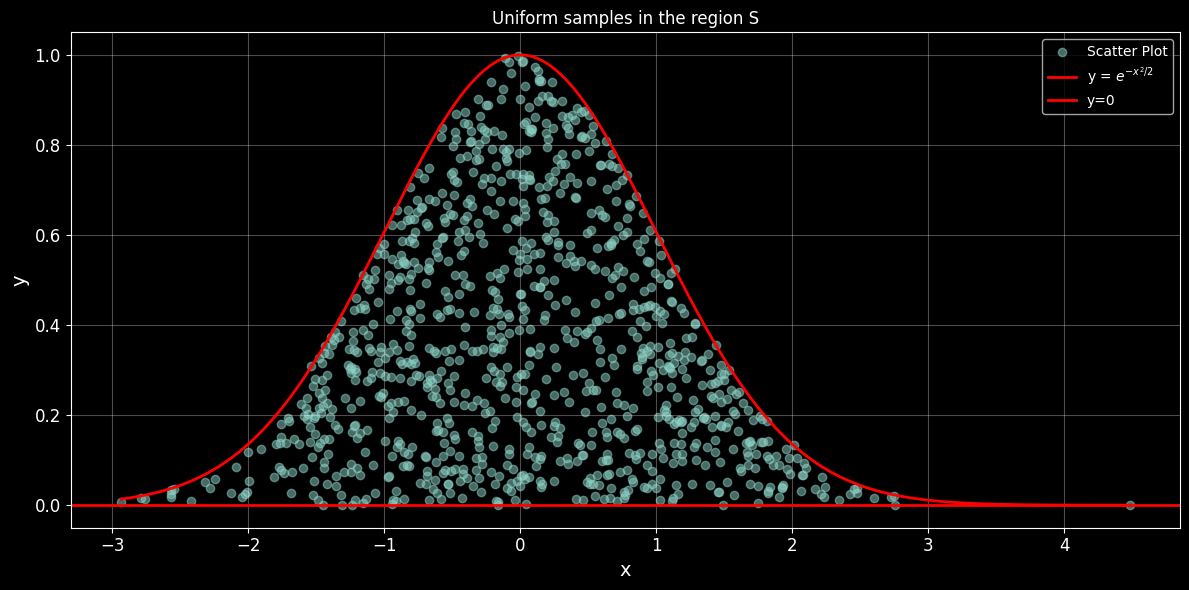

In [15]:

def q2af(x):
    return np.exp(-x**2 / 2)

n = 1000

X = np.random.normal(0, 1, n)

U = np.random.uniform(0, 1, n)
Y = U * q2af(X)

plt.figure(figsize=(12, 6))
plt.scatter(X, Y, alpha=0.5, label='Scatter Plot')

x_range = np.linspace(min(X), max(X), 1000)
plt.plot(x_range, q2af(x_range), 'r', linewidth=2, label='y = $e^{-x^2/2}$')
plt.axhline(y=0, color='r', linewidth=2, label='y=0')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Uniform samples in the region S')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

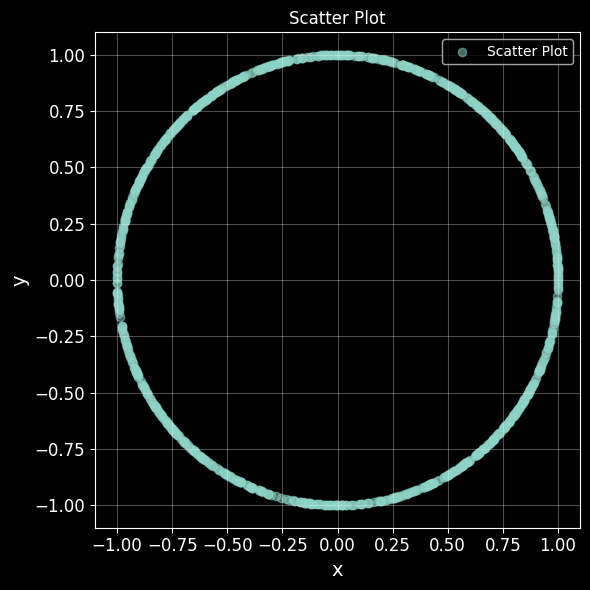

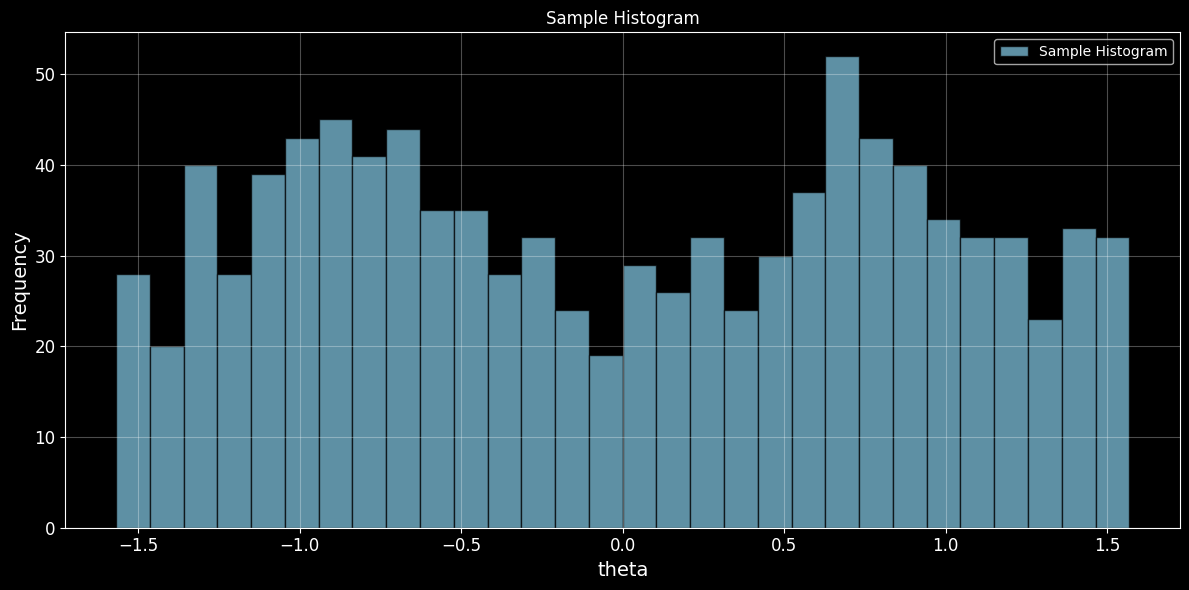

Mean of theta: -0.00810868312374069
std of theta: 0.9043972086061881


In [16]:
def func_x(u, v):
  return u/(np.sqrt(u**2 + v**2))

def func_y(u, v):
  return v/(np.sqrt(u**2 + v**2))

def distribution():
  u = np.random.uniform(-1, 1)
  v = np.random.uniform(-1, 1)
  x = func_x(u, v)
  y = func_y(u, v)
  return x, y

def generate_sample(n):
  X = []
  Y = []
  while len(X) < n:
    x, y = distribution()
    X.append(x)
    Y.append(y)
  return X, Y

n = 1000
X, Y = generate_sample(n)

plt.figure(figsize=(6, 6))
plt.scatter(X, Y, alpha=0.5, label='Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

theta = []
for i in range(len(X)):
  theta.append(np.arctan(Y[i]/X[i]))
plt.figure(figsize=(12, 6))
plt.hist(theta, bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='Sample Histogram')
plt.xlabel('theta')
plt.ylabel('Frequency')
plt.title('Sample Histogram')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print('Mean of theta: ' + str(np.mean(theta)))
print('std of theta: ' + str(np.std(theta)))

The points look uniformally distributed on the circumference of the circle but the histogram of the angle is not similar to a uniform distribution. So, although the points look uniformally distributed over the circumference in the scatter plot, they are not.

<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

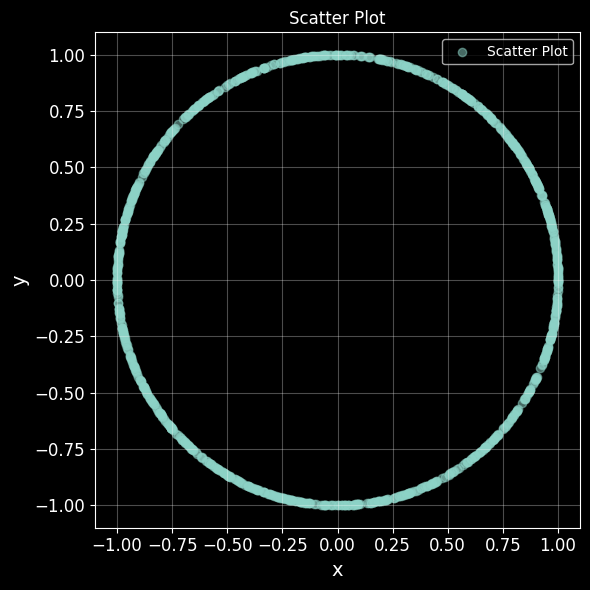

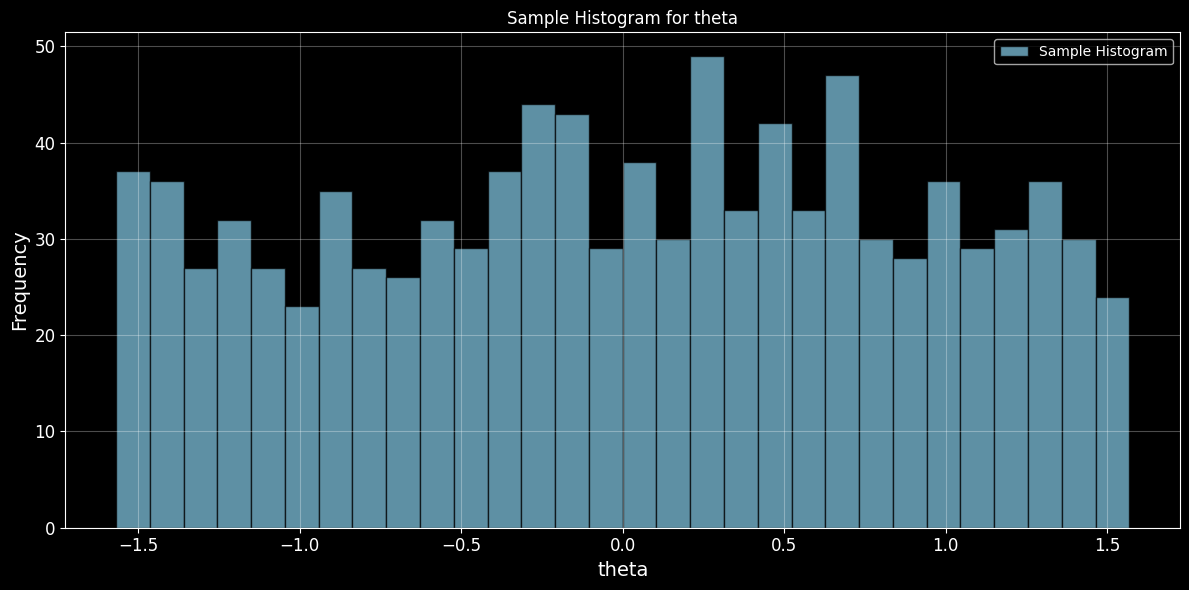

Mean of theta: 0.011284073524539574
std of theta: 0.8781507329440886


In [17]:
def func_x(u, v):
  return u/(np.sqrt(u**2 + v**2))

def func_y(u, v):
  return v/(np.sqrt(u**2 + v**2))

def distribution():
  u = np.random.normal()
  v = np.random.normal()
  x = func_x(u, v)
  y = func_y(u, v)
  return x, y

def generate_sample(n):
  X = []
  Y = []
  while len(X) < n:
    x, y = distribution()
    X.append(x)
    Y.append(y)
  return X, Y

n = 1000
X, Y = generate_sample(n)

plt.figure(figsize=(6, 6))
plt.scatter(X, Y, alpha=0.5, label='Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

theta = []
for i in range(len(X)):
  theta.append(np.arctan(Y[i]/X[i]))
plt.figure(figsize=(12, 6))
plt.hist(theta, bins=30, alpha=0.7, color='skyblue', edgecolor='black', label='Sample Histogram')
plt.xlabel('theta')
plt.ylabel('Frequency')
plt.title('Sample Histogram for theta')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print('Mean of theta: ' + str(np.mean(theta)))
print('std of theta: ' + str(np.std(theta)))


The points look uniformally distributed on the circumference of the circle and the frequency distribution of the angle represented by the histogram is also similar to a uniform distribution.

The difference lies in how the random variables are generated. In part (b), the (x,y) coordinates are generated using uniform RV within a square. While in part (c), its generated using standard normal RVs. Square samples are biased as the area covered/probability along the corners is less than the ones along the axes. While the samples generated using standard normal are directionally uniform.  

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.
\begin{align*}
P(U.S stocks > 0) & = 1 - P(U.S stocks \le 0)\\
& = 1 - F_{U.S. stocks}(0)\\
& = 1 - Φ(\frac{0-\mu_{U.S. stocks}}{ σ_{U.S. stocks}})\\
& = Φ(\frac{\mu_{U.S. stocks}}{ σ_{U.S. stocks}})\\
& = Φ(\frac{0.14}{0.25})\\
& = 0.7123\\\\
P(U.S bonds > 0) & = 1 - P(U.S bonds \le 0)\\
& = 1 - F_{U.S bonds}(0)\\
& = 1 - Φ(\frac{0-\mu_{U.S. bonds}}{ σ_{U.S. bonds}})\\
& = Φ(\frac{\mu_{U.S. bonds}}{ σ_{U.S. bonds}})\\
& = Φ(\frac{0.07}{0.1})\\
& = 0.758\\\\
P(EM bonds > 0) & = 1 - P(EMbonds \le 0)\\
& = 1 - F_{EM bonds}(0)\\
& = 1 - Φ(\frac{0-\mu_{EM bonds}}{ σ_{EM bonds}})\\
& = Φ(\frac{\mu_{EM bonds}}{ σ_{EM bonds}})\\
& =Φ(\frac{0.16}{0.3})\\
& = 0.703
\end{align*}

Since these are independent of each other then the joint probability is just the product of individual probability:

\begin{align*}
P(U.S stocks > 0, U.S bonds > 0, EM bonds > 0) & = P(U.S stocks > 0)*P(U.S bonds > 0)*P(EM bonds > 0)\\
& = 0.7123*0.758*0.703\\
& = 0.3796
\end{align*}




<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [18]:
sigma = [[0.0625, -0.01, 0.0375], [-0.01, 0.01, -0.015], [0.0375, -0.015, 0.09]]
mu = [0.14, 0.07, 0.16]
a = sc.linalg.cholesky(sigma, lower=True)
samples = []
n = 10000
count=0
i=0
while i < n:
  z1 = np.random.normal(0, 1)
  z2 = np.random.normal(0, 1)
  z3 = np.random.normal(0, 1)
  x1 = a[0][0]*z1 + a[0][1]*z2 + a[0][2]*z3 + mu[0]
  x2 = a[1][0]*z1 + a[1][1]*z2 + a[1][2]*z3 + mu[1]
  x3 = a[2][0]*z1 + a[2][1]*z2 + a[2][2]*z3 + mu[2]
  if x1 > 0 and x2 > 0 and x3 > 0:
    count+=1
  i+=1
mean = float(count/n)
print('Mean: ' + str(mean))
conf_int = 1.96*np.sqrt(mean*(1.0-float(mean))/n)
print('95% confidence interval: [' +  str(mean - conf_int) + ', ' + str(mean + conf_int) + ']')

Mean: 0.3737
95% confidence interval: [0.36421780622589894, 0.383182193774101]


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.

Let $V \sim \text{Unif}[\alpha,\beta]$. Then  

$$
\mathbb{E}[V] = \frac{\alpha + \beta}{2}, \quad
\mathrm{Var}(V) = \frac{(\beta - \alpha)^2}{12}.
$$

We require $\mathbb{E}[V] = 0$ and $\mathrm{Var}(V) = 1$.

$$
\frac{\alpha + \beta}{2} = 0 \quad \implies \quad \beta = -\alpha.
$$

Substituting into the variance condition,  

$$
\frac{(\beta - \alpha)^2}{12} = 1.
$$

Since $\beta = -\alpha$,  

$$
\frac{((- \alpha) - \alpha)^2}{12}
= \frac{(-2\alpha)^2}{12}
= \frac{4\alpha^2}{12}
= \frac{\alpha^2}{3}
= 1.
$$

Thus,  

$$
\alpha^2 = 3 \quad \implies \quad \alpha = \pm \sqrt{3}, \ \beta = -\alpha.
$$

Hence, the solution is  

$$
(\alpha,\beta) = (-\sqrt{3},\sqrt{3}).
$$

<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

**Ans.**

We have $X_1, X_2 \sim \text{Unif}[\alpha,\beta]$ i.i.d. with $\alpha=-\sqrt{3}, \ \beta=\sqrt{3}$, and $B \sim \text{Bernoulli}(p)$ independent of them.  

Define  

$$
V_1 = X_1, \qquad V_2 = (1-B)X_1 + BX_2.
$$

**Expectation:**  

$$
\mathbb{E}[V_2] = (1-p)\mathbb{E}[X_1] + p\mathbb{E}[X_2] = 0.
$$

**Variance:**  

$$
\mathrm{Var}(V_2) = (1-p)\mathbb{E}[X_1^2] + p\mathbb{E}[X_2^2] = (1-p)(1) + p(1) = 1.
$$

**Final Answer:**  

$$
\mathbb{E}[V_2] = 0, \qquad \mathrm{Var}(V_2) = 1.
$$

In [19]:
a = -np.sqrt(3)
b = np.sqrt(3)

n = 100000
x1 = np.random.uniform(a, b, n)
x2 = np.random.uniform(a, b, n)
b = np.random.binomial(1, 0.5, n)

v1 = x1
v2 = (1 - b) * x1 + b * x2
conf_int = 1.96*np.std(v2)/np.sqrt(n)
print("Expectation of V2:", np.mean(v2))
print("Variance of V2:", np.var(v2))
print("95% conf interval of mean: " + str([np.mean(v2) - conf_int, np.mean(v2) + conf_int]))


Expectation of V2: 0.0011926018697940666
Variance of V2: 1.0036766018673757
95% conf interval of mean: [np.float64(-0.005016845797860208), np.float64(0.007402049537448341)]


<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

**Ans.**

We have  

$$
V_1 = X_1, \qquad V_2 = (1-B)X_1 + BX_2,
$$  

with $X_1, X_2 \sim \text{Unif}[-\sqrt{3}, \sqrt{3}]$ i.i.d. (mean $0$, variance $1$) and $B \sim \text{Bernoulli}(p)$ independent of them.  

---

**Covariance:**  

$$
\mathrm{Cov}(V_1, V_2) = \mathbb{E}[V_1V_2] - \mathbb{E}[V_1]\mathbb{E}[V_2].
$$  

Since $\mathbb{E}[V_1] = \mathbb{E}[V_2] = 0$, this reduces to  

$$
\mathrm{Cov}(V_1, V_2) = \mathbb{E}[V_1 V_2].
$$  

Now,  

$$
V_1 V_2 = X_1\big((1-B)X_1 + BX_2\big) = (1-B)X_1^2 + B(X_1X_2).
$$  

Taking expectation:  

$$
\mathbb{E}[V_1 V_2] = (1-p)\mathbb{E}[X_1^2] + p\,\mathbb{E}[X_1X_2].
$$  

Since $X_1, X_2$ are independent with mean $0$,  

$$
\mathbb{E}[X_1X_2] = \mathbb{E}[X_1]\mathbb{E}[X_2] = 0, \qquad \mathbb{E}[X_1^2] = 1.
$$  

Thus,  

$$
\mathrm{Cov}(V_1, V_2) = (1-p)(1) + p(0) = 1 - p.
$$  

---

**Set equal to required covariance:**  

$$
1 - p = \sigma_{12}.
$$  

---

**Final Answer:**  

$$
p = 1 - \sigma_{12}, \qquad \text{valid for } 0 \leq \sigma_{12} \leq 1.
$$

<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

**Ans.**

We implement a function to generate correlated uniform random variables $(V_1,V_2)$ using the construction derived earlier.  

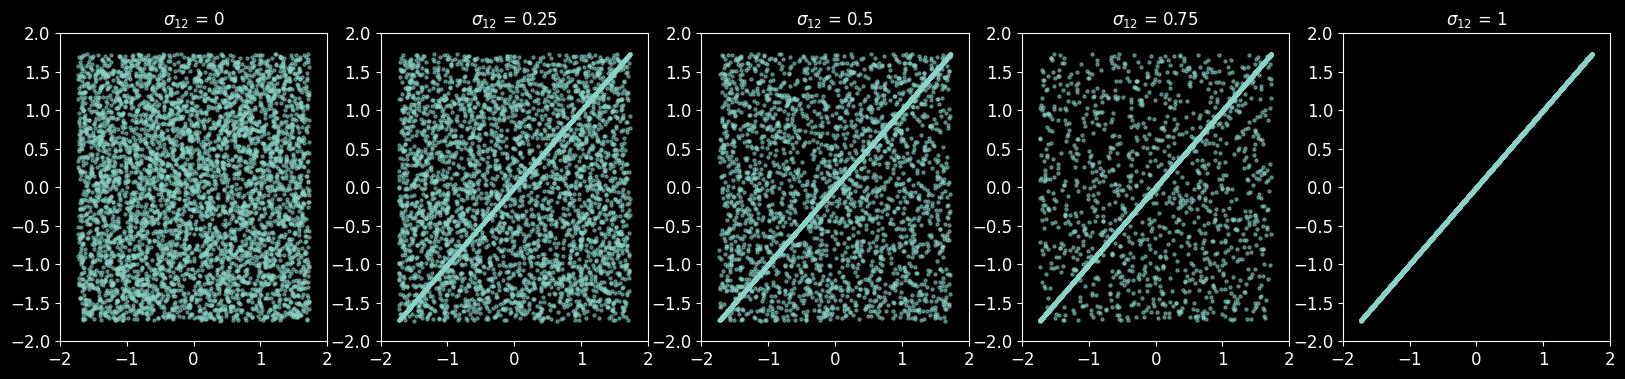

In [20]:

def generate_correlated_uniforms(n, sigma12):
    p = 1 - sigma12
    X1 = np.random.uniform(-np.sqrt(3), np.sqrt(3), n)
    X2 = np.random.uniform(-np.sqrt(3), np.sqrt(3), n)

    B = np.random.binomial(1, p, n)
    V1 = X1
    V2 = (1 - B) * X1 + B * X2
    return V1, V2


n = 5000
correlations = [0, 0.25, 0.5, 0.75, 1]
fig, axes = plt.subplots(1, len(correlations), figsize=(20,4))

for i, sigma in enumerate(correlations):
    V1, V2 = generate_correlated_uniforms(n, sigma)
    axes[i].scatter(V1, V2, s=5, alpha=0.5)
    axes[i].set_title(f"$\\sigma_{{12}}$ = {sigma}")
    axes[i].set_xlim(-2, 2)
    axes[i].set_ylim(-2, 2)

plt.show()

<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [33]:
n = 20000
V1, V2 = generate_correlated_uniforms(n, 0.5)
sample = (V1 <= 0) & (V2 <= 0)
prob = np.mean(sample)
print("Probability P[V_1<= 0,V_2<= 0] : ",prob)

Probability P[V_1<= 0,V_2<= 0] :  0.3749


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.
We use the **Gaussian copula trick**. Generate $(Z_1,Z_2)$ as bivariate normals with covariance  

$$
\Sigma =
\begin{pmatrix}
1 & 0.5 \\
0.5 & 1
\end{pmatrix}.
$$

Then apply the probability integral transform:  

$$
U_i = \Phi(Z_i), \quad i=1,2,
$$

where $\Phi$ is the standard normal cdf. Since $\Phi(Z_i) \sim U[0,1]$, the transformed random variables  

$$
W_i = \alpha + (\beta-\alpha)U_i
$$

are uniform on $[\alpha,\beta]$. With $\alpha=-\sqrt{3}, \; \beta=\sqrt{3}$ we get  

$$
\mathbb{E}[W_i]=0, \quad \mathrm{Var}(W_i)=1.
$$

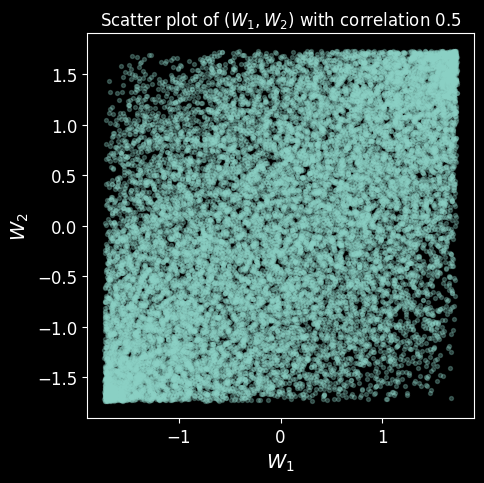

P[W1 ≥ 0, W2 ≥ 0] ≈ 0.3349


In [18]:
from scipy.special import erf

def generate_copula_uniform(n, sigma12=0.5):
    # covariance matrix
    Sigma = [[1, sigma12],[sigma12,1]]
    # step 1: correlated normals
    Z = np.random.multivariate_normal([0,0], Sigma, size=n)
    # step 2: map to Uniform[0,1] via Phi
    U = 0.5*(1 + erf(Z/np.sqrt(2)))
    # step 3: map to Uniform[alpha,beta]
    alpha, beta = -np.sqrt(3), np.sqrt(3)
    W = alpha + (beta-alpha)*U
    return W

# generate
n = 20000
W = generate_copula_uniform(n, sigma12=0.5)
W1, W2 = W[:,0], W[:,1]

# scatter plot
plt.figure(figsize=(5,5))
plt.scatter(W1, W2, alpha=0.3, s=8)
plt.xlabel("$W_1$")
plt.ylabel("$W_2$")
plt.title("Scatter plot of $(W_1,W_2)$ with correlation 0.5")
plt.show()

# probability both >= 0
prob = np.mean((W1 >= 0) & (W2 >= 0))
print("P[W1 ≥ 0, W2 ≥ 0] ≈", prob)